# Trabalho de algoritmo imunologico
* Arthur Severo de Souza
* Victor Le Roy Matos

In [81]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# Definindo variaveis globais
MAX_IT = 50

N = 50
N1 = 50
N2 = 0

BETA = 0.1
NC = BETA * N #  Define o número de clones a ser gerado para cada anticorpo
RO = 5 # Parâmetro da equação de mutação

In [83]:
class Individual:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.affinity = None
        self.mappedAffinity = None

    def __str__(self):
        return (
            "x: " + str(self.x) + "         " +
            "y: " + str(self.y) + "         " +
            "affinity: " + str(self.affinity) + "         " +
            "mappedAffinity: " + str(self.mappedAffinity)
        )

    def calculateAffinity(self, affinityFunction):
        self.affinity = affinityFunction(self.x, self.y)

    def calculateMapAffinity(self, mappingFunction, i, N):
        self.mappedAffinity = mappingFunction(i, N)

    def tryToMutate(self, mutate_rate):
        if np.random.rand() < mutate_rate:
            self.x = np.random.uniform(-10, 10)
        if np.random.rand() < mutate_rate:
            self.y = np.random.uniform(-10, 10)

In [84]:
# Bird function
def affinityFunction(x, y):
    result = (
        np.sin(x) * np.exp((1 - np.cos(y))**2) +
        np.cos(y) * np.exp((1 - np.sin(x))**2) +
        (x - y)**2
    )
    return result

In [85]:
def linearMappingFunction(i, N):
    min = 0
    max = N
    result = min + (max - min) * ((N - i) / (N - 1))
    return round(result)

In [86]:
def sortPopulation(population):
    return sorted(population, key=lambda individual: individual.affinity)

In [87]:
def generateIndividuals():
    S = []
    for i in range(N):
        S.append(Individual(np.random.uniform(-10, 10), np.random.uniform(-10, 10)))
    return S

In [88]:
def clonalgOPT():
    population = generateIndividuals()
    t = 1
    while t <= MAX_IT:

        for p in population:
            p.calculateAffinity(affinityFunction)
        population = sortPopulation(population)
        for i, p in enumerate(population):
            p.calculateMapAffinity(linearMappingFunction, i + 1, N)

        new_population = []
        D_max = population[0].mappedAffinity
        for i, p in enumerate(population):
            D_star = p.mappedAffinity / D_max
            mutate_rate = np.exp(-(RO * D_star))
            clone_population = []
            for i in range(int(NC)):
                clone = Individual(p.x, p.y)
                clone.tryToMutate(mutate_rate)
                clone.calculateAffinity(affinityFunction)
                clone_population.append(clone)
            clone_population = sortPopulation(clone_population)
            new_population.append(clone_population[0])
        population = new_population
        t = t + 1

    return population

In [89]:
def plot3D (population):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = affinityFunction(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
    ax.view_init(elev=100)

    ax.contour(X, Y, Z, levels=8, cmap='viridis', zorder=1)
    ax.set_title('Contour plot - Bird function')

    xdata = np.array([p.x for p in population])
    ydata = np.array([p.y for p in population])
    zdata = affinityFunction(xdata, ydata)

    ax.scatter(xdata, ydata, zdata, c='red', cmap='viridis', linewidth=0.5, zorder=1)

    plt.show()

C:\Users\Victor\AppData\Local\Temp\ipykernel_21740\834273671.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xdata, ydata, zdata, c='red', cmap='viridis', linewidth=0.5, zorder=1)


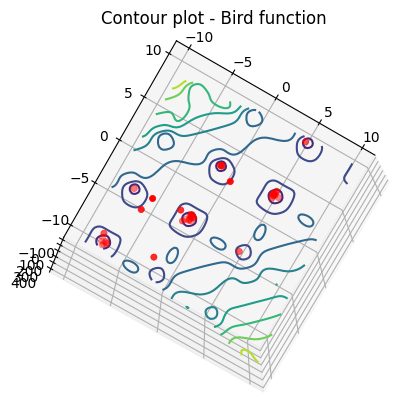

In [90]:
antibody_population = clonalgOPT()

# for p in antibody_population:
#     print(p.__str__())

plot3D(antibody_population)